### Download the markers data from the Cell Markers 2.0

In [8]:
!wget http://117.50.127.228/CellMarker/CellMarker_download_files/file/Cell_marker_All.xlsx 


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
markers = pd.read_excel('data\Cell_marker_All.xlsx')

In [4]:
markers.head()

,species,tissue_class,tissue_type,uberonongology_id,cancer_type,cell_type,cell_name,cellontology_id,marker,Symbol,GeneID,Genetype,Genename,UNIPROTID,technology_seq,marker_source,PMID,Title,journal,year
0,Human,Abdomen,Abdomen,UBERON_0000916,Normal,Normal cell,Macrophage,CL_0000235,MERTK,MERTK,10461.0,protein_coding,"MER proto-oncogene, tyrosine kinase",Q12866,None,Experiment,31982413.0,Peritoneal Level of CD206 Associates With Mort...,Gastroenterology,2020.0
1,Human,Abdomen,Abdomen,UBERON_0000916,Normal,Normal cell,Macrophage,CL_0000235,CD16,FCGR3A,2215.0,protein_coding,Fc fragment of IgG receptor IIIb,O75015,None,Experiment,31982413.0,Peritoneal Level of CD206 Associates With Mort...,Gastroenterology,2020.0
2,Human,Abdomen,Abdomen,UBERON_0000916,Normal,Normal cell,Macrophage,CL_0000235,CD206,MRC1,4360.0,protein_coding,mannose receptor C-type 1,P22897,None,Experiment,31982413.0,Peritoneal Level of CD206 Associates With Mort...,Gastroenterology,2020.0
3,Human,Abdomen,Abdomen,UBERON_0000916,Normal,Normal cell,Macrophage,CL_0000235,CRIg,VSIG4,11326.0,protein_coding,V-set and immunoglobulin domain containing 4,Q9Y279,None,Experiment,31982413.0,Peritoneal Level of CD206 Associates With Mort...,Gastroenterology,2020.0
4,Human,Abdomen,Abdomen,UBERON_0000916,Normal,Normal cell,Macrophage,CL_0000235,CD163,CD163,9332.0,protein_coding,CD163 molecule,Q86VB7,None,Experiment,31982413.0,Peritoneal Level of CD206 Associates With Mort...,Gastroenterology,2020.0


In [10]:
markers['species'].value_counts()

Human    60877
Mouse    35197
Name: species, dtype: int64

In [11]:
human = markers[markers['species'] == 'Human']
mouse = markers[markers['species'] == 'Mouse']

In [12]:
mouse.head()

,species,tissue_class,tissue_type,uberonongology_id,cancer_type,cell_type,cell_name,cellontology_id,marker,Symbol,GeneID,Genetype,Genename,UNIPROTID,technology_seq,marker_source,PMID,Title,journal,year
8,Mouse,Abdomen,Muscle,UBERON_0001630,Normal,Normal cell,Fibro-adipogenic progenitor cell,NaN,Wisp1,Ccn4,22402.0,protein_coding,cellular communication network factor 4,O54775,10x Chromium,Experiment,35439171.0,An estrogen-sensitive fibroblast population dr...,JCI insight,2022.0
9,Mouse,Abdomen,Muscle,UBERON_0001630,Normal,Normal cell,Myoblast,CL_0000056,Myod1,Myod1,17927.0,protein_coding,myogenic differentiation 1,P10085,10x Chromium,Experiment,35439171.0,An estrogen-sensitive fibroblast population dr...,JCI insight,2022.0
10,Mouse,Abdomen,Muscle,UBERON_0001630,Normal,Normal cell,Muscle satellite cell,CL_0000514,Myf5,Myf5,17877.0,protein_coding,myogenic factor 5,A2RSK4,10x Chromium,Experiment,35439171.0,An estrogen-sensitive fibroblast population dr...,JCI insight,2022.0
11,Mouse,Abdomen,Muscle,UBERON_0001630,Normal,Normal cell,Myocyte,CL_0000187,Ckm,Ckm,12715.0,protein_coding,"creatine kinase, muscle",A2RTA0,10x Chromium,Experiment,35439171.0,An estrogen-sensitive fibroblast population dr...,JCI insight,2022.0
12,Mouse,Abdomen,Muscle,UBERON_0001630,Normal,Normal cell,Myocyte,CL_0000187,Acta1,Acta1,11459.0,protein_coding,"actin alpha 1, skeletal muscle",P68134,10x Chromium,Experiment,35439171.0,An estrogen-sensitive fibroblast population dr...,JCI insight,2022.0


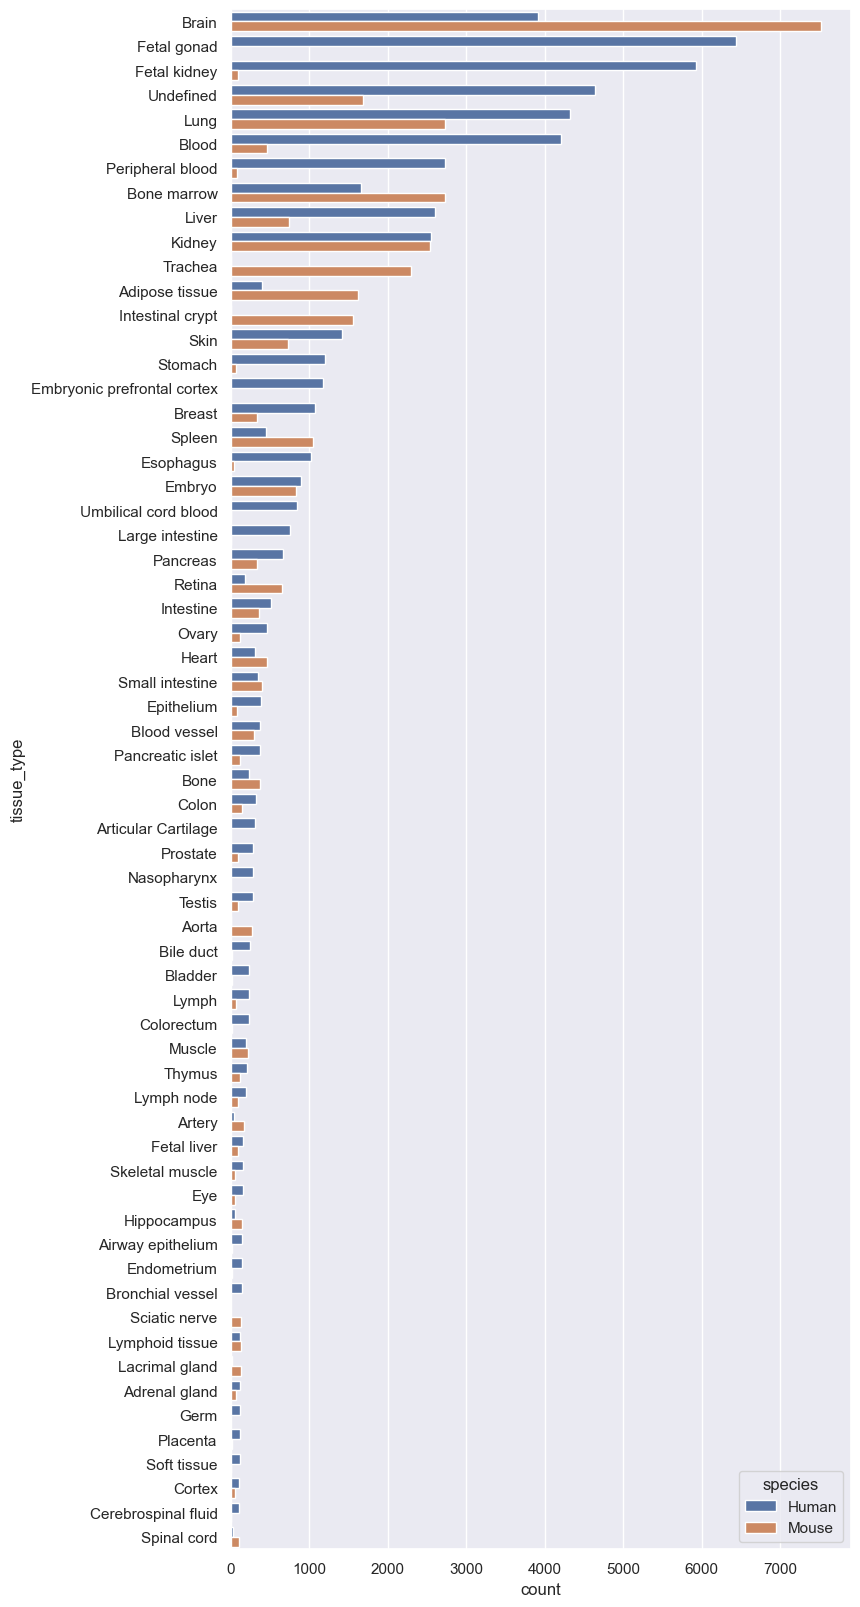

In [13]:
sns.set(rc={'figure.figsize':(8,20)})


# Create a new dataframe with the count of each tissue_type for each species
counts = markers.groupby(['species', 'tissue_type']).size().reset_index(name='counts')

counts = counts[counts['counts'] > 100]
# Sort the new dataframe based on the count of each tissue_type
counts = counts.sort_values('counts', ascending=False).reset_index(drop=True)

# Get a sorted list of unique tissue_types
sorted_tissue_types = list(counts['tissue_type'].unique())

# Plot the sorted countplot
sns.countplot(data=markers, y='tissue_type', hue='species', order=sorted_tissue_types)


plt.show()

In [15]:
embryo = human[human['tissue_type'] == 'Embryo']

embryo['cell_name'].value_counts()

Trophectoderm cell            119
Morula cell (Blastomere)      112
Epiblast cell                 105
Primitive endoderm cell       101
Oocyte                         97
                             ... 
Perivascular cell               1
Astroglial progenitor cell      1
Colonocyte                      1
Pancreatic progenitor cell      1
Podocyte precursor cell         1
Name: cell_name, Length: 61, dtype: int64

In [14]:
embryo = human[human['tissue_type'] == 'Embryo']

sns.set(rc={'figure.figsize':(8,20)})


# Create a new dataframe with the count of each tissue_type for each species
counts = embryo.groupby(['species', 'tissue_type']).size().reset_index(name='counts')

counts = counts[counts['counts'] > 100]
# Sort the new dataframe based on the count of each tissue_type
counts = counts.sort_values('counts', ascending=False).reset_index(drop=True)

# Get a sorted list of unique tissue_types
sorted_tissue_types = list(counts['tissue_type'].unique())

# Plot the sorted countplot
sns.countplot(data=markers, y='tissue_type', hue='species', order=sorted_tissue_types)


plt.show()

,species,tissue_class,tissue_type,uberonongology_id,cancer_type,cell_type,cell_name,cellontology_id,marker,Symbol,GeneID,Genetype,Genename,UNIPROTID,technology_seq,marker_source,PMID,Title,journal,year
32651,Human,Embryo,Embryo,UBERON_0000922,Normal,Normal cell,Neuron,CL_0000540,NeuN,NaN,NaN,NaN,NaN,NaN,NaN,Experiment,1483388.0,"NeuN, a neuronal specific nuclear protein in v...","Development (Cambridge, England)",1992.0
32655,Human,Embryo,Embryo,UBERON_0000922,Normal,Normal cell,Neuron,CL_0000540,FE65,APBB1,322.0,protein_coding,amyloid beta precursor protein binding family ...,O00213,NaN,Experiment,7867517.0,Expression of the neuron-specific FE65 gene ma...,Developmental neuroscience,1994.0
32665,Human,Embryo,Embryo,UBERON_0000922,Normal,Normal cell,Embryonic stem cell,CL_0002322,OCT3/4,NaN,NaN,NaN,NaN,NaN,NaN,Experiment,10742100.0,Quantitative expression of Oct-3/4 defines dif...,Nature genetics,2000.0
32677,Human,Embryo,Embryo,UBERON_0000922,Normal,Normal cell,Germ cell,CL_0000586,ZAR1,ZAR1,326340.0,protein_coding,zygote arrest 1,B9EG67,NaN,Experiment,15189828.0,Spatio-temporal expression of the germ cell ma...,Biology of reproduction,2004.0
32678,Human,Embryo,Embryo,UBERON_0000922,Normal,Normal cell,Germ cell,CL_0000586,BMP15,BMP15,9210.0,protein_coding,bone morphogenetic protein 15,O95972,NaN,Experiment,15189828.0,Spatio-temporal expression of the germ cell ma...,Biology of reproduction,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36218,Human,Embryo,Embryo,UBERON_0000922,Normal,Normal cell,Endothelial cell,CL_0000115,RUNX1,RUNX1,861.0,protein_coding,RUNX family transcription factor 1,Q01196,10x Chromium,Experiment,35418685.0,Mapping human haematopoietic stem cells from h...,Nature,2022.0
36219,Human,Embryo,Embryo,UBERON_0000922,Normal,Normal cell,Endothelial cell,CL_0000115,PTPRC,PTPRC,5788.0,protein_coding,protein tyrosine phosphatase receptor type C,M9MML4,10x Chromium,Experiment,35418685.0,Mapping human haematopoietic stem cells from h...,Nature,2022.0
36220,Human,Embryo,Embryo,UBERON_0000922,Normal,Normal cell,Hematopoietic stem cell,CL_0000037,RAB27B,RAB27B,5874.0,protein_coding,"RAB27B, member RAS oncogene family",O00194,10x Chromium,Experiment,35418685.0,Mapping human haematopoietic stem cells from h...,Nature,2022.0
36221,Human,Embryo,Embryo,UBERON_0000922,Normal,Normal cell,Hematopoietic stem cell,CL_0000037,SPINK2,SPINK2,6691.0,protein_coding,serine peptidase inhibitor Kazal type 2,D6RI10,10x Chromium,Experiment,35418685.0,Mapping human haematopoietic stem cells from h...,Nature,2022.0


In [36]:
human['cell_name'].value_counts()

Natural killer T (NKT) cell    4914
B cell                         2198
Cancer stem cell               1933
Monocyte                       1585
Endothelial cell               1465
                               ... 
Schwann cell                      1
Portal vein cell                  1
Transitional memory T cell        1
Non-neural ectoderm cell          1
CD3/CD28-stimulated NK cell       1
Name: cell_name, Length: 1715, dtype: int64

In [44]:
human['marker'].value_counts()

CD44        534
CD4         455
CD14        447
CD3         445
CD133       427
           ... 
TRIM55        1
PDZD2         1
SAMD4A        1
CCDC178       1
Loricrin      1
Name: marker, Length: 16679, dtype: int64

In [16]:
import collections

markers_by_cellType = embryo[['cell_name','marker']].groupby(['cell_name','marker']).count()

In [17]:
markers_by_cellType = markers_by_cellType.pivot_table(index='cell_name', columns='marker', aggfunc='size', fill_value=0)
markers_by_cellType

marker,AARS2,ABCA5,ABCC4,ABCG2,ABHD12B,ABHD6,ABI3BP,ACCSL,ACE,ACTA2,...,ZNF652,ZSCAN10,ZSCAN29,ZSWIM3,ZYG11A,cTnI,cTnT,α-MHC,αSMA,β-MHC
cell_name,,,,,,,,,,,,,,,,,,,,,
1-cell stage cell (Blastomere),0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4-cell stage cell (Blastomere),0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
8-cell stage cell (Blastomere),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Astroglial progenitor cell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cancer stem cell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trophoblast cell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trophoblast stem cell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Unrestricted somatic stem cell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
markers_by_cellType.reset_index(inplace=True)

In [19]:
markers_by_cellType

marker,cell_name,AARS2,ABCA5,ABCC4,ABCG2,ABHD12B,ABHD6,ABI3BP,ACCSL,ACE,...,ZNF652,ZSCAN10,ZSCAN29,ZSWIM3,ZYG11A,cTnI,cTnT,α-MHC,αSMA,β-MHC
0,1-cell stage cell (Blastomere),0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,4-cell stage cell (Blastomere),0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,8-cell stage cell (Blastomere),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Astroglial progenitor cell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cancer stem cell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Trophoblast cell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,Trophoblast stem cell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,Unrestricted somatic stem cell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,Visceral endodermal cell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [79]:
# Separate the features and the labels
X = markers_by_cellType.iloc[:, 2:]
y = markers_by_cellType.iloc[:, 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.0


In [80]:
y

0           1-cell stage cell (Blastomere)
1                      11b+ dendritic cell
2                      11b- dendritic cell
3           4-cell stage cell (Blastomere)
4           8-cell stage cell (Blastomere)
                       ...                
1710          pre-MSN(medium spiny neuron)
1711    vasa recta Endothelial cell (ECvr)
1712               von Economo neuron(VEN)
1713                            γ δ T cell
1714                                δ cell
Name: cell_name, Length: 1715, dtype: object